In [394]:
import numpy as np
from random import randint
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import BatchNormalization, Concatenate,concatenate
from keras.models import load_model
from keras.optimizers import Adam
from keras.layers import Input
from keras.models import Model
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sn
from keras.utils import to_categorical
from sklearn.datasets.samples_generator import make_blobs
import math

In [395]:
learning_rate = 0.001
logIndex = 19
input_dropout_rate = 0.3
dropout_rate = 0.5

#hidden_layers = [5000, 1000, 500]
hidden_layers = [500, 100, 50]
n_output = 5

batch_size = 50
epochs = 150

#loss='categorical_crossentropy'
loss='binary_crossentropy'

In [396]:
def createData():
    X = []
    y = []
    for i in range(1000):
        x1 = randint(1, 5)
        x2 = randint(1, 5)
        out = np.abs(x1-x2)
        X.append([x1/5, x2/5])
        yi = [0] * 5
        yi[out] = 1
        y.append(yi)
    X = np.array(X)
    y = np.array(y)
    
    #separa dati di train da dati di test
    test_size=0.33
    return train_test_split(X, y, test_size=test_size, random_state=42)

    return X, y

def createComplexData():
    X = []
    y = []
    for i in range(1000):
        x1  = []
        x2  = []
        out = []
        for j in range(5):
            a = randint(1, 5)
            b = randint(1, 5)
            x1.append(a/5)
            x2.append(b/5)
            out.append(np.abs(a-b))
        out_mean = int(out[0]*0.1+out[1]*0.2+out[2]*0.1+out[3]*0.3+out[4]*0.3)
        X.append(np.concatenate([x1, x2]))
        yi = [0] * 5
        yi[out_mean] = 1
        y.append(yi)
    X = np.array(X)
    y = np.array(y)
    
    #separa dati di train da dati di test
    test_size=0.33
    return train_test_split(X, y, test_size=test_size, random_state=42)

    return X, y

In [397]:
def modelClassificationMonoInput():
    n_input = X_train.shape[1]
    
    input = Input((n_input,))

    layer = input
    for i in range(len(hidden_layers)):
        #aggiunge lo strato nascosto
        #layer = BatchNormalization()(layer)
        layer = Dense(hidden_layers[i])(layer)
        layer = Dropout(dropout_rate)(layer)
        layer = Activation('relu')(layer)

    #aggiunge lo strato di uscita
    #layer = BatchNormalization()(layer)
    layer = Dense(n_output)(layer)
    layer = Dropout(dropout_rate)(layer)
    output = Activation('softmax')(layer)

    #crea il modello
    model = Model(input, output)

    #compila la rete neurale
    optimizer = Adam(lr=learning_rate)
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

    #addestra la rete neurale
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=1) 
    
    return model, history

In [398]:
def printSingleInputScore():
    score = model.evaluate(X_test, y_test, verbose=0)
    print('test score:', score[0])
    print('test accuracy:', score[1])

def getClassLabelAndPredictionsSingleInput():
    #ottiene le predictions dal modello
    res_prediction = model.predict(X_test)
    _labels = y_test

    _predictions = np.zeros_like(res_prediction)
    for i in range(len(res_prediction)):
        _predictions[i, np.argmax(res_prediction[i])] = 1
    
    return _labels, _predictions
    
def printConfusionMatrix(_predictions, _labels):
    #valuta la classificazione
    predictions_max = np.argmax(_predictions, axis=1)
    y_test_max = np.argmax(_labels, axis=1)

    #calcola gli score
    accuracy_score_val = accuracy_score(y_test_max, predictions_max)
    precision_score_val = precision_score(y_test_max, predictions_max, average='weighted') # tp / (tp + fp)
    recall_score_val = recall_score(y_test_max, predictions_max, average='weighted') # tp / (tp + fn)
    f1_score_val = f1_score(y_test_max, predictions_max, average='weighted')

    #stampa gli score
    print("accuracy_score: %0.4f" % accuracy_score_val)
    print("precision_score: %0.4f" % precision_score_val)
    print("recall_score: %0.4f" % recall_score_val)
    print("f1_score: %0.4f" % f1_score_val)

    #ottiene e stampa la confusion matrix
    cm = confusion_matrix(y_test_max, predictions_max)
    #print(cm)
    df_cm = pd.DataFrame(cm, 
                         index = [i for i in range(cm.shape[0])],
                         columns = [i for i in range(cm.shape[1])])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

In [399]:
def plotClassHistory():
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [400]:
X_train, X_test, y_train, y_test = createData()
#X_train, X_test, y_train, y_test = createComplexData()

Train on 670 samples, validate on 330 samples
Epoch 1/150
670/670 [==============================] - 2s 2ms/step - loss: 0.4968 - acc: 0.8000 - val_loss: 0.4900 - val_acc: 0.8000
Epoch 2/150
670/670 [==============================] - 0s 134us/step - loss: 0.4917 - acc: 0.7991 - val_loss: 0.4841 - val_acc: 0.8000
Epoch 3/150
670/670 [==============================] - 0s 134us/step - loss: 0.4857 - acc: 0.7991 - val_loss: 0.4822 - val_acc: 0.8000
Epoch 4/150
670/670 [==============================] - 0s 137us/step - loss: 0.4838 - acc: 0.8003 - val_loss: 0.4782 - val_acc: 0.8000
Epoch 5/150
670/670 [==============================] - 0s 131us/step - loss: 0.4825 - acc: 0.8000 - val_loss: 0.4759 - val_acc: 0.8000
Epoch 6/150
670/670 [==============================] - 0s 132us/step - loss: 0.4861 - acc: 0.7982 - val_loss: 0.4722 - val_acc: 0.8000
Epoch 7/150
670/670 [==============================] - 0s 137us/step - loss: 0.4780 - acc: 0.7997 - val_loss: 0.4628 - val_acc: 0.8000
Epoch 8/150

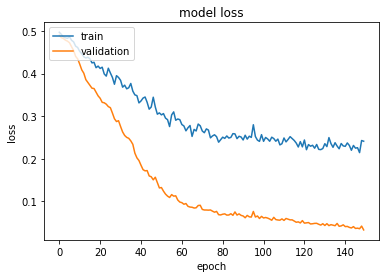

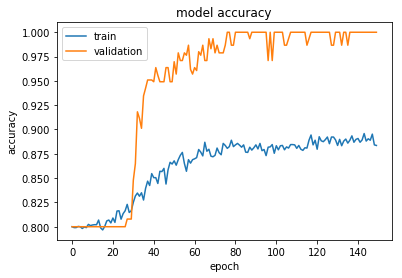

In [401]:
model, history = modelClassificationMonoInput()
plotClassHistory()

test score: 0.03313799396608815
test accuracy: 1.0
accuracy_score: 1.0000
precision_score: 1.0000
recall_score: 1.0000
f1_score: 1.0000


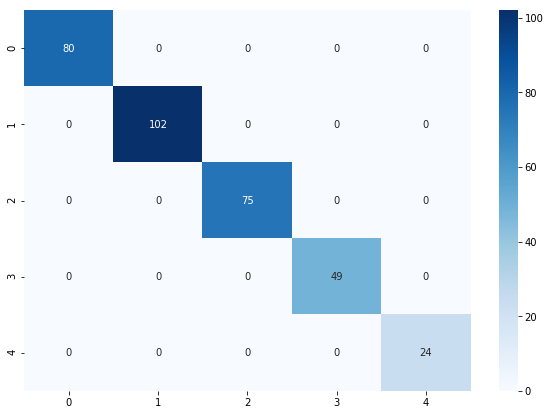

In [402]:
printSingleInputScore()
labels, predictions = getClassLabelAndPredictionsSingleInput()
printConfusionMatrix(predictions, labels)